<a href="https://colab.research.google.com/github/jugernaut/MACTI-programacionparalelo/blob/main/MPI/02_MonteCarlo_SCP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Monte Carlo</i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Profesor: M. en C. Miguel Angel Pérez León</i></h5>
    <h5 align="center"><i>Ayudante: Jesús Iván Coss Calderón</i></h5>
    <h5 align="center"><i>Ayudante: Mario Arturo</i></h5>
  <h5 align="center"><i>Materia: Seminario de programación en paralelo</i></h5>
  </font>


# Introducción

Son un conjunto de métodos y técnicas para analizar fenómenos por medio de algoritmos computacionales que dependen fundamentalmente de números aleatorios.

Estos métodos son relativamente nuevos y fueron empleados para el desarrollo de la bomba atómica, en la segunda guerra mundial. Particularmente en este tema fueron empleados para la simulación de problemas probabilísticos de hidrodinámica concernientes a la difusión de neutrones en el material de fisión.

Los pioneros en el desarrollo de estos métodos son John von Neumann y Stanislaw Ulam. Ambos trabajando para el **proyecto Manhattan** emplearon una versión temprana de los métodos de Monte Carlo para realizar simulaciones concernientes al choque de partículas que se lleva a cabo al momento de una reacción nuclear.

Los métodos de Monte Carlo proporcionan aproximaciones a una gran variedad de problemas matemáticos en los cuales llegar a una solución analítica es muy costoso. Son aplicables a cualquier tipo de problema, ya sea estocástico o determinista.

A diferencia de los métodos numéricos que se basan en evaluaciones de $N-puntos$ en un espacio $M-dimensional$ para producir una solución aproximada, los métodos de Monte Carlo tiene un error absoluto con respecto a la aproximación, que decrece conforme N aumenta. Para ser mas exactos decrece a razón de

$$\frac{1}{\sqrt{N}}$$

En **teoría** todo método de Monte Carlo converge a la solución exacta, en la **práctica** se consigue una precisión modesta.


# Generación de números aleatorios

Es complicado definir el termino *aleatorio*, pero de manera informal podemos expresarlo así.

La sucesión $S=x_{1},x_{2},\ldots\,\in\left(0,1\right)$ se puede decir aleatoria si:

1.   Los números parecen estar distribuidos al azar en todo el intervalo $\left(0,1\right)$.
2.   Parece no haber un patrón en la sucesión $S$.

Una definición precisa de **aleatoriedad** es muy difícil de establecer y en algunos artículos, se relaciona directamente la aleatoriedad con la complejidad computacional $(Chaitlin [1975])$.

Así que lo mejor, a manera de introducción es aceptar la idea intuitiva de aleatoriedad.

## Algoritmos y generadores de valores aleatorios

La mayoría de los lenguajes de programación cuentan con generadores de números aleatorios dentro de sus bibliotecas. Incluso algunos generadores aceptan como parámetros, la semilla (valor inicial para genera números aleatorios) o el tipo de distribución.

Para los algoritmos empleados dentro de los métodos de Monte Carlo es fundamental emplear una rutina para generar una sucesión números aleatorios uniformemente distribuida en algún rango determinado.

Lo números generados por una computadora no pueden ser verdaderamente aleatorios, por que la forma en la que se producen es totalmente determinista. Sin embargo las sucesiones generadas por rutinas de computadora, pasan ciertas pruebas de aleatoriedad. Es por esto que algunos autores prefieren darle el adjetivo de pseudoaleatorias a estas sucesiones.

A continuación se muestra el pseudocódigo de una pequeña rutina que se emplea para generar números aleatorios.

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/MonteCarlo/algMonte.PNG?raw=1" width="700">



# Aproximación de $\pi$

El ejemplo más conocido para mostrar como funcionan los métodos de Monte Carlo, es el de la aproximación del valor de $\pi$.

Existen diferentes versiones de como fue ideada esta aproximación pero normalmente se encuentra en la literatura como aproximación de $\pi$ mediante lanzamiento de dardos o aproximación de $\pi$ empleando gotas de lluvia.

La idea básica de esta aproximación es generar pares de números aleatorios dentro de un dominio y calcular la probabilidad de que estos números aleatorios pertenezcan a un subconjunto del dominio, es decir.

Consideremos la circunferencia unitaria, circunscrita dentro de un cuadrado de lado 2.

Ahora supongamos que alguien comienza a lanzar dardos que caen dentro del cuadrado y ademas están **distribuidos de manera uniforme**.

El marco teórico de los métodos de Monte Carlo indica que podemos aproximar el valor de $\pi$ a partir de calcular la probabilidad de que los dardos lanzados caigan dentro de la circunferencia unitaria circunscrita dentro del cuadrado de lado 2.

De manera tal que $P_{dardos}$ sera la probabilidad de que los dardos caigan dentro de la circunferencia y para calcular esta probabilidad basta con realizar el siguiente calculo.

$$P_{dardos}=\frac{Area\,Circunferencia}{Area\,Cauadrado}$$

Recordando un poco de cálculo.

$$\frac{Area\,Circunferencia}{Area\,Cauadrado}=\frac{\int_{-1}^{1}dx\int_{-\sqrt{1-x^{2}}}^{\sqrt{1-x^{2}}}dy}{\int_{-1}^{1}dx\int_{-1}^{1}dy}=\frac{2\int_{-1}^{1}\sqrt{1-x^{2}}dx}{2*2}=\frac{\pi}{4}$$

De lo que podemos concluir que

$$P_{dardos}=\frac{Area\,Circunferencia}{Area\,Cauadrado}=\frac{\pi}{4}$$

Es decir que

$$ \pi=4*P_{dardos}$$

Finalmente solo resta dividir entre el numero de lanzamientos que se hayan realizado para obtener una aproximación del valor de $\pi$.

$$\pi\approx\frac{4*P_{dardos}}{N}$$


Donde $N$ es la cantidad de lanzamientos de dardos que se hayan realizado y con lo mencionado previamente, a mayor numero de lanzamientos (experimentos, muestras, etc.) la aproximación encontrada será más cercana al valor real.




interactive(children=(IntSlider(value=10, description='n', max=10000, step=1000), Output()), _dom_classes=('wi…

<function __main__.mc_pi_aprox(n)>

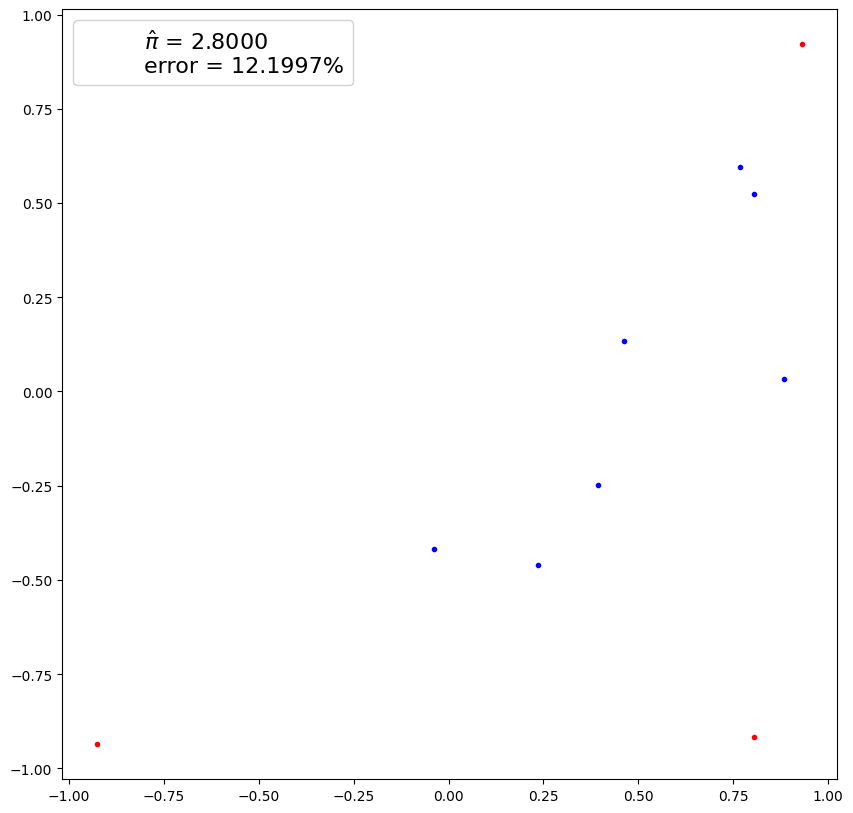

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact
import ipywidgets as widgets

def mc_pi_aprox(n):
    # tamano de la imagen
    plt.figure(figsize=(10,10))
    # se generan valores de x,y de manera uniforme
    x, y = np.random.uniform(-1, 1, size=(2, n))
    # interior contiene la cantidad de dardos
    # que calleron en la circunferencia
    interior = (x**2 + y**2) <= 1
    # se calcula el valor aproximado de pi
    pi = interior.sum() * 4 / float(n)
    # se calcula el error abs
    error = abs((pi - np.pi) / pi) * 100
    # dardos que calleron fuera
    exterior = np.invert(interior)
    # seccion de graficas
    plt.plot(x[interior], y[interior], 'b.')
    plt.plot(x[exterior], y[exterior], 'r.')
    plt.plot(0, 0, label='$\hat \pi$ = {:4.4f}\nerror = {:4.4f}%'
             .format(pi,error), alpha=0)
    plt.legend(frameon=True, framealpha=0.9, fontsize=16)

interact(mc_pi_aprox,n=widgets.IntSlider(min=0,max=10000,step=1000,value=10))

# Teorema fundamental de Monte Carlo

Consideremos la variable aleatoria $G_{N}$, promedio de una función $g\left(X_{i}\right)$ es decir

$$G_{N}=\frac{1}{N}\sum_{i=1}^{N}g\left(X_{i}\right) \tag{1}$$

Cuya esperanza y varianza son respectivamente

$$E\left[G_{N}\right]=E\left[g\left(X\right)\right],\quad var\left(G_{N}\right)=\frac{var\left(g\left(X\right)\right)}{N} \tag{2}$$

Al promedio $G_{N}$ se le llama estimador de $E\left[g\left(X\right)\right]$, pues su esperanza vale

$$E\left[G_{N}\right]=E\left[g\left(X\right)\right]=\int_{-\infty}^{\infty}g\left(x\right)f\left(x\right)dx \tag{3}$$

Donde $X_{i}\sim f$. Es decir que podemos evaluar la integral anterior generando un conjunto de $N$ variables aleatorias $X_{i}$ según $f\left(x\right)$ y evaluando $g\left(x\right)$ para cada una de ellas.

El estimador (1) (la media aritmética de los $g\left(x\right)$ generados) nos da el valor de la integral (3).

Ademas podemos ver que la varianza del estimador disminuye al crecer $N$. De hecho, aplicando la desigualdad de Chebyshev a la variable aleatoria $G_{N}$ con $\sigma^{2}=var\left(G_{N}\right),\,x^{2}=\frac{\sigma^{2}}{\delta}\,y\,\delta>0$,

$$P\left(\left|G_{N}-E\left[G_{N}\right]\right|\geq\left[\frac{var\left(G_{N}\right)}{\delta}\right]^{\frac{1}{2}}\right)\leq\delta \tag{4}$$

Lo que significa que generando una muestra suficientemente grande $\left(N\gg\frac{1}{\delta}\right)$ la probabilidad de que el estimador se aleje del valor esperado $g\left(X\right)$ es tan pequeña como se desee.


# Integración Numérica mediante Monte Carlo

**Cálculo de áreas y volúmenes**

Una de las principales aplicaciones de los métodos de Monte Carlo es la aproximación de una integral definida. Si seleccionamos los primeros $n$ elementos $x_{1},x_{2},\ldots,x_{n}$ de una sucesión aleatoria en el intervalo $\left(0,1\right)$, entonces,

$$\int_{0}^{1}f\left(x\right)dx\approx\frac{1}{n}\sum_{i=1}^{n}f\left(x_{i}\right)$$

Es decir, que la integral definida se aproxima mediante el promedio de los $n$ números $f\left(x_{1}\right),f\left(x_{2}\right),\ldots,f\left(x_{n}\right)$. Y como ya se menciono previamente, al hacerlo de esta forma, el error de aproximación es de orden $\frac{1}{\sqrt{n}}$, lo cual podría parecer pobre y sin posibilidad de competir con los métodos numéricos tradicionales.

La ventaja de la metodología de Monte Carlo radica en su simplicidad y el que su base es tomar una muestra representativa del comportamiento de un fenómeno $\left(f\left(x\right)\right)$ para poder determinar propiedades del mismo.


Pero al evaluar integrales múltiples, este método cobra gran importancia, por ejemplo

$$\int_{0}^{1}\int_{0}^{1}\int_{0}^{1}f\left(x,y,z\right)dxdydz\approx\frac{1}{n}\sum_{i=1}^{n}f\left(x_{i},y_{i},z_{i}\right)$$

Donde $\left(x_{i},y_{i},z_{i}\right)$ es una sucesión aleatoria de $n$ puntos en el cubo unitario $0\leq x\leq1,\,0\leq y\leq1 \quad$ y $\quad0\leq z\leq1$

Si el intervalo (en una integral unidimensional) no es de longitud 1, pero por ejemplo es el caso general $\left(a,b\right)$, entonces el promedio de $f$ en $n$ puntos aleatorios en $\left(a,b\right)$ no es simplemente una aproximación a la integral, en realidad es

$$\frac{1}{b-a}\int_{a}^{b}f\left(x\right)dx \Rightarrow \int_{a}^{b}f\left(x\right)dx\approx\frac{b-a}{n}\sum_{i=1}^{n}f\left(x_{i}\right)$$

Que concuerda con la intención de que la función $f\left(x\right)=1$ tiene un promedio de 1.

Y sucede lo mismo al evaluar integrales múltiples, es decir que el promedio de $f$ se obtiene integrando y dividiendo entre el área. el volumen o una medida de esa región.

De manera general podemos enunciar el método de Monte Carlo para aproximar integrales de la siguiente forma

$$\int_{A}f\approx\left(medida\,de\,A\right)\times\left(promedio\,de\,f\,en\,n\,puntos\,aleatorios\,en\,A\right)$$

En este caso estamos usando el hecho de que el promedio de una función en un conjunto es igual a la integral de la función en el conjunto, dividido entre la media del conjunto.

## Ejemplo

Supongamos que se busca aproximar la integral definida de $f(x)$ de $0$ a $5$, entonces la aproximación mediante Monte Carlo se calcula de la siguiente manera.

$$\int_{0}^{5}f\left(x\right)dx\approx\frac{5}{n}\sum_{i=1}^{n}f\left(x_{i}\times\left(5-0\right)+0\right)$$

Por otr lado, si se busca aproximar la integral doble definida de $2$ a $5$ y de $1$ a $6$, entonces la aproximación esta dada por.

$$\int_{2}^{5}\int_{1}^{6}f\left(x,y\right)dxdy\approx\frac{15}{n}\sum_{i=1}^{n}f\left(x_{i}\times\left(5-2\right)+2,y_{i}\times\left(6-1\right)+1\right)$$

In [ ]:
import numpy as np

'''Integracion numerica de Monte Carlo
f: funcion a integrar
N: numero de valores aleatorios
a,b,c,d: limites de integracion
'''
def MonteCarloDoble(f,N,a,b,c,d):
    # area a integrar
    dim = (b-a)*(d-c)
    # valores aleatorios para
    a1 = np.random.uniform(size=N)
    a2 = np.random.uniform(size=N)
    # version alternativa
    #a1 = np.random.uniform(a,b,size=N)
    #a2 = np.random.uniform(c,d,size=N)
    # acumulador temporal
    temp = 0
    # ciclo para realizar la suma de MC
    for i in range(N):
        # valores recorridos
        xr = a1[i]*(b-a)+a
        yr = a2[i]*(d-c)+c
        # version alternativa
        #temp += fun(a1[i],a2[i])
        # evaluacion
        temp += f(xr,yr)
    # aproximacion mediante MC
    return dim*temp/N

integral1 = lambda x,y : x-2*y
integral2 = lambda x,y : (x**2)*y

print(MonteCarloDoble(integral1, 1000, 0, 3, -1, 1))
#print(MonteCarloDoble(integral2, 1000, 0, 3, -1, 1))

9.151334235518604


Puedes comparar los resultados obtenidos mediante el algoritmo anterior contra los resultados que ofrece [WolframAlpha](https://www.wolframalpha.com/widgets/view.jsp?id=166b2328e7bdc984f0a6b65ede732ed6).

# Simulación

Consideremos un fenómeno físico en el cuál un elemento aleatorio se encuentra presente y la idea de una simulación es intentar dar una imitación de este fenómeno mediante el uso de una computadora.

Se pueden sacar muchas conclusiones estadísticas si este fenómeno se repite muchas veces

Las aplicaciones que se le pueden dar a las simulaciones, incluyen la simulación de servidores, clientes, filas de espera que pueden darse en empresas tales como bancos o un sin fin de situaciones.

En esta ultima sección veremos una simulación muy simple pero muy ilustrativa de como se puede modelar la densidad y centro de masa de una lamina.



## Densidad y Centro de Masa

La doble integral tiene múltiples interpretaciones ademas del calculo de volúmenes, en este ejemplo analizaremos otra interpretación que involucra una sección del espacio con base en la región $R$ del plano $xy$ de altura $1$; a esta sección le llamaremos **lamina**.

Por otro lado existen diferentes formas de aproximar de manera numérica el calculo de la integral, sin embargo la mas sencilla es la integral usando métodos de **Monte Carlo**.

El problema de encontrar la masa total de una lamina es uno de naturaleza continua, ya que esta se distribuye en cada punto de su superficie; en términos de masa por unidad de área (por ejemplo, $\frac{kg}{m^{2}}$) esta densidad de masa es representada por la función $\mu\left(x,y\right)$.

Al tratar de encontrar su centro de masa hay que considerar de igual forma la masa en cada punto. Es aquí cuando el cálculo se vuelve nuestra principal herramienta. La masa total de una lamina esta dada por la expresión:

$$M=\int\int_{R}\mu\left(x,y\right)dA$$

Y su centro de masa se encuentra en las coordenadas:

$$x_{m}=\frac{1}{M}\int\int_{R}x\mu\left(x,y\right)dA \quad y_{m}=\frac{1}{M}\int\int_{R}y\mu\left(x,y\right)dA$$

Dada la presencia de integrales dobles, el método que utilizaremos para resolverlas numéricamente es el de integración de Monte Carlo, debido a su sencillez y facilidad de implementación.

## Densidad de Masa

Supongamos que la densidad de masa de una lamina está dada por la función $\mu\left(x,y\right)$; en particular supongamos que la región $R$ en el plano $xy$ está particionada en secciones cuadradas de longitud $h$. Entonces la partición que contiene al punto $\left(x,y\right)$ tiene una masa total de $\triangle m$ y un área de $\triangle A$, por lo tanto la densidad de masa en el punto $\left(x,y\right)$ esta definida como:

$$\mu\left(x,y\right)=\underset{h\rightarrow0}{lim}\frac{\triangle m}{\triangle A}$$

O bien, definimos la función de densidad de masa como una aproximación de la forma $\mu\left(x,y\right)\thickapprox\frac{\triangle m}{\triangle A}$, ¿qué tan aproximada es esta expresión?, depende de que tan cercana esté $h$ de $0$.

## Masa total

Con la aproximación anterior, podemos dar la siguiente expresión para la masa de la partición: $\triangle m\thickapprox\mu\left(x,y\right)\triangle A$. Como resultado, decimos que la masa total de la lamina es la suma de la masa de todas sus particiones:

$$M=\sum_{i}\sum_{j}\triangle m_{i,j}\thickapprox\sum_{i}\sum_{j}\mu\left(x,y\right)\triangle A_{i,j}$$

Al acercarse $h$ a cero:

$$M=\int\int_{R}\mu\left(x,y\right)dA$$

## Centro de masa

Se sabe que que si se tiene $n$ objetos con masas respectivas $m_{1},m_{2},\ldots,m_{n}$ y posiciones $\left(x_{1},y_{1}\right),\left(x_{2},y_{2}\right)\ldots\left(x_{n},y_{n}\right)$, entonces su centro de masa es el punto en el plano con coordenadas:

$$x_{m}=\frac{m_{1}x_{1}+\ldots+m_{n}x_{n}}{m_{1}+\ldots+m_{n}};\,y_{m}=\frac{m_{1}y_{1}+\ldots+m_{n}y_{n}}{m_{1}+\ldots+m_{n}}$$

Si una lamina con densidad de masa $\mu\left(x,y\right)$ está particionada en $n$ partes con masas $\triangle m_{1},\triangle m_{2},\ldots,\triangle m_{n}$ y posiciones $\left(x_{1},y_{1}\right),\left(x_{2},y_{2}\right)\ldots\left(x_{n},y_{n}\right)$ respectivamente, entonces el centro de masa de la lamina está aproximadamente en el punto:

$$x_{m}\thickapprox\frac{\triangle m_{1}x_{1}+\ldots+\triangle m_{n}x_{n}}{\triangle m_{1}+\ldots+\triangle m_{n}}\quad y_{m}\thickapprox\frac{\triangle m_{1}y_{1}+\ldots+\triangle m_{n}y_{n}}{\triangle m_{1}+\ldots+\triangle m_{n}}$$

Como $\triangle m_{1}x_{1}+\ldots+\triangle m_{n}x_{n}=M$, donde $M$ es la masa total de la lamina, y como $\triangle m_{i}=\mu\left(x_{i},y_{i}\right)\triangle A_{i}$ con $\triangle A_{i}$ el área de la partición $i$:

$$x_{m}\thickapprox\frac{x_{1}\mu\left(x_{1},y_{1}\right)\triangle A_{1}+\ldots+x_{n}\mu\left(x_{n},y_{n}\right)\triangle A_{n}}{M}
\quad
y_{m}\thickapprox\frac{y_{1}\mu\left(x_{1},y_{1}\right)\triangle A_{1}+\ldots+y_{n}\mu\left(x_{n},y_{n}\right)\triangle A_{n}}{M}$$

Al acercarse el tamaño de las particiones a $0$, bien $n$ a $\infty$:

$$x_{m}=\frac{1}{M}\int\int_{R}x\mu\left(x,y\right)dA
\quad y_{m}=\frac{1}{M}\int\int_{R}y\mu\left(x,y\right)dA$$

## Solución Analítica

Si se considera una función de densidad $\mu\left(x,y\right)=\left(x+2y\right)\frac{kg}{m^{2}}$, entonces la masa y centro de masa corresponden a:

*   Masa $\int_{0}^{1}\int_{0}^{1}\left(x+2y\right)dydx=1.5\,kg$.
*   Centro de masa:
> *   $x_{m}=\frac{1}{1.5}\int_{0}^{1}\int_{0}^{1}\left(x^{2}+2yx\right)dydx=0.5556$
> *   $y_{m}=\frac{1}{1.5}\int_{0}^{1}\int_{0}^{1}\left(xy+2y^{2}\right)dydx=0.611$

Si se considera una función de densidad $\mu\left(x,y\right)=\left(\sin\left(\sqrt{x^{2}+y^{2}}\right)\right)\frac{kg}{m^{2}}$, entonces la masa y centro de masa corresponden a:

*   Masa $\int_{\text{-1}}^{1}\int_{\text{-1}}^{1}\left(\sin\left(\sqrt{x^{2}+y^{2}}\right)\right)dydx=2.6635\,kg$.
*   Centro de masa:
> *   $x_{m}=\frac{1}{2.6635}\int_{\text{-1}}^{1}\int_{\text{-1}}^{1}\left(x\sin\left(\sqrt{x^{2}+y^{2}}\right)\right)dydx=0$
> *   $y_{m}=\frac{1}{2.6635}\int_{\text{-1}}^{1}\int_{\text{-1}}^{1}\left(y\sin\left(\sqrt{x^{2}+y^{2}}\right)\right)dydx=0$






## Integral de Monte Carlo

Para utilizar el método de integración de Monte Carlo, necesitaremos generar $N$ números aleatorios en un espacio de dos dimensiones, con una distribución uniforme.

Usaremos la siguiente expresión de aproximación:

$$\int_{a}^{b}\int_{c}^{d}f\left(x,y\right)dydx\thickapprox\frac{\left(b-a\right)\left(d-c\right)}{N}\sum_{1}^{N}f\left(x_{i},y_{i}\right)$$

Donde $x_{i}\in\left[a,b\right]$ y $y_{i}\in\left[a,b\right]\,\forall i$

Como podemos ver, el método de integración de Monte Carlo es perfecto para esta aplicación de las integrales dobles, ya que el obstáculo mas grande para ser implementado es el generar los $N$ números aleatorios, pero ya existen herramientas para ayudarnos con esto.

masa= 2.669779747035488
centro de masa: x= 0.0017023761649480299  y= -0.014205199195698025


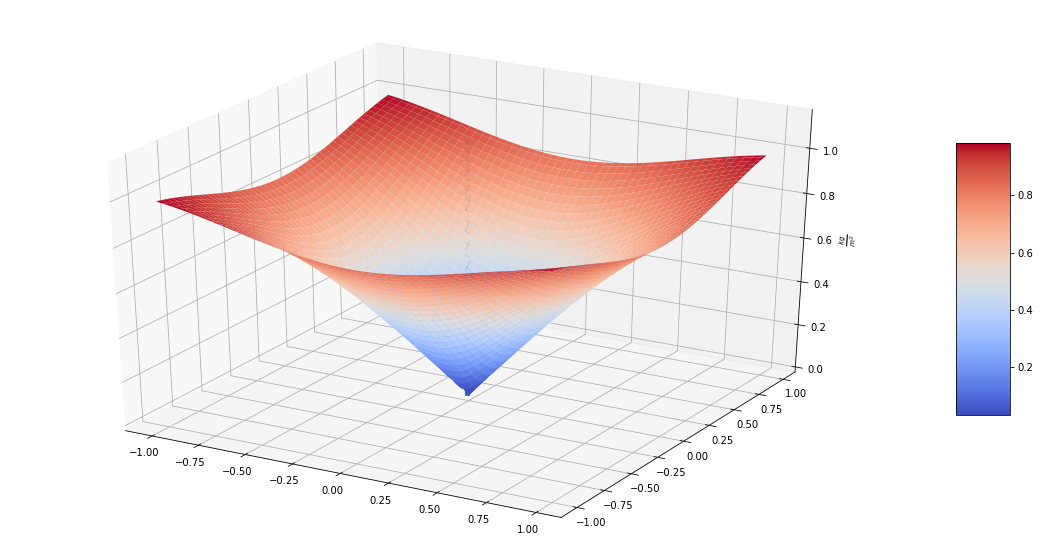

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline

'''Integracion numerica de Monte Carlo
f: funcion a integrar
N: numero de valores aleatorios
a,b,c,d: limites de integracion
'''
def MonteCarloDoble(f,N,a,b,c,d):
    # area a integrar
    dim = (b-a)*(d-c)
    # valores aleatorios para
    a1 = np.random.uniform(size=N)
    a2 = np.random.uniform(size=N)
    # version alternativa
    #a1 = np.random.uniform(a,b,size=N)
    #a2 = np.random.uniform(c,d,size=N)
    # acumulador temporal
    temp = 0
    # ciclo para realizar la suma de MC
    for i in range(N):
        # valores recorridos
        xr = a1[i]*(b-a)+a
        yr = a2[i]*(d-c)+c
        # version alternativa
        #temp += fun(a1[i],a2[i])
        # evaluacion
        temp += f(xr,yr)
    # aproximacion mediante MC
    return dim*temp/N

'''Devuelve la masa de una lamina en una
mu: funcion de densidad
a,b,c,d: area de la lamina [a,b]X[c,d]
N: cantidad de experimentos
'''
def masa(mu,a,b,c,d,N):
	  return MonteCarloDoble(mu,N,a,b,c,d)

'''Devuelve la cordenada (x,y) del centro de masa de la lamina
mux:
muy:
'''
def CentroMasa(mux,muy,M,a,b,c,d,N):
    x = MonteCarloDoble(mux,N,a,b,c,d)/M
    y = MonteCarloDoble(muy,N,a,b,c,d)/M
    return (x,y)

# funcion de densidad CAMBIAR PARA PRUEBAS
def mu(x,y):
    #return x + (2*y)
    return np.sin(np.sqrt(x**2 + y**2))
    #return 1

# funcion para centro de masa en x
def mux1(x,y):
	  return x*mu(x,y)

# funcion para centro de masa en y
def muy1(x,y):
	  return y*mu(x,y)

# funcion principal
def main():
    # dimension de la lamina
    #a = 0.
    a = -1.
    b = 1.
    #c = 0.
    c = -1.
    d = 1.
    #Tamano de la muestra aleatoria
    N=10000
    #Calculo de la masa
    M = masa(mu,a,b,c,d,N)
    #Calculo del centro de masa
    x,y = CentroMasa(mux1,muy1,M,a,b,c,d,N)

    print ("masa=", M)
    print ("centro de masa: x=",x," y=",y)

    #graficas
    fig = plt.figure(figsize=(20,10))
    #fig = plt.figure()
    ax = fig.gca(projection='3d')

    size = 100
    X = np.arange(a, b, (b-a)/size)
    Y = np.arange(c, d, (d-c)/size)

    X, Y = np.meshgrid(X, Y)
    Z = np.zeros((size,size))
    for i in range(size):
        for j in range(size):
            Z[i][j] = mu(X[i][j],Y[i][j])

    ax.plot([x,x],[y,y],[mu(x,y),80*mu(x,y)],linewidth=5)
    #ax.plot([x,x],[y,y],[mu(x,y),10*mu(x,y)],linewidth=5)
    surf = ax.plot_surface(X, Y, Z, alpha=1., cmap=cm.coolwarm,linewidth=3)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_zlabel(r'$\frac{kg}{m^2}$',fontsize=10)

# llamada a funcion principal
main()



# Resumen

En general la forma en la que trabajan los métodos de Monte Carlo es sencilla de entender y fácil de aplicar.

La única consideración que piden estos métodos es que los puntos sean aleatorios y distribuidos de manera uniforme.

En general muchos de los modelos matemáticos contienen integrales simples o múltiples, así como sistemas de ecuaciones o aproximaciones a raíces, de tal manera que los métodos de Monte Carlo son una alterativa bastante útil para encontrar una aproximación a la solución de estos modelos.

# Referencias

*   [Teorema Fundamental de Monte Carlo](https://www.ugr.es/~jillana/Docencia/FM/mc.pdf).
*   Richard L. Burden, J. Douglas Faires, Análisis Numérico, Math Learning.
*   Yuri N. Skiba, Introducción a los Métodos Numéricos.